# Data Science: Class 1

Exercise in nbs/class_01.ipynb

In [2]:
import pandas
import seaborn as sns
import plotnine
import scipy

In [4]:
data = pandas.read_csv("/Users/sylvainestebe/Code/DataSci-AU-24-1/data/randomnumber.csv")
questions =  pandas.read_csv("/Users/sylvainestebe/Code/DataSci-AU-24-1/data/randomnumber_codebook.csv")

In [5]:
data.shape

(1369, 71)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 71 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   submittime  1369 non-null   object
 1   R1          1369 non-null   int64 
 2   R2          1369 non-null   int64 
 3   R3          1369 non-null   int64 
 4   R4          1369 non-null   int64 
 5   R5          1369 non-null   int64 
 6   R6          1369 non-null   int64 
 7   R7          1369 non-null   int64 
 8   R8          1369 non-null   int64 
 9   R9          1369 non-null   int64 
 10  R10         1369 non-null   int64 
 11  R11         1369 non-null   int64 
 12  R12         1369 non-null   int64 
 13  R13         1369 non-null   int64 
 14  R14         1369 non-null   int64 
 15  R15         1369 non-null   int64 
 16  R16         1369 non-null   int64 
 17  R17         1369 non-null   int64 
 18  R18         1369 non-null   int64 
 19  R19         1369 non-null   int64 
 20  R20     

In [63]:
data.describe()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,...,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,71.971512,489.910153,95.937180,280.379109,48.068663,588.612126,54.864865,30.842221,57.004383,90.149014,...,3.720964,2.170928,4.104456,2.083272,3.826881,1.880935,3.987582,3.215486,4.105186,3.988313
std,928.472135,653.820866,1217.521956,121.802923,44.023814,535.102114,180.765199,19.087976,270.353148,37.124589,...,1.119148,1.143250,1.019568,1.103062,0.964263,1.124421,0.972122,1.242354,1.014822,0.980740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,95.000000,55.000000,200.000000,17.000000,167.000000,23.000000,15.000000,25.000000,72.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,50.000000,500.000000,61.000000,255.000000,50.000000,547.000000,50.000000,33.000000,50.000000,85.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,64.000000,683.000000,74.000000,360.000000,69.000000,921.000000,72.000000,45.000000,69.000000,100.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,34340.000000,9952.000000,45108.000000,997.000000,700.000000,9876.000000,6543.000000,333.000000,9963.000000,1125.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


guess: missing numbers are coded as 0

<Axes: ylabel='Count'>

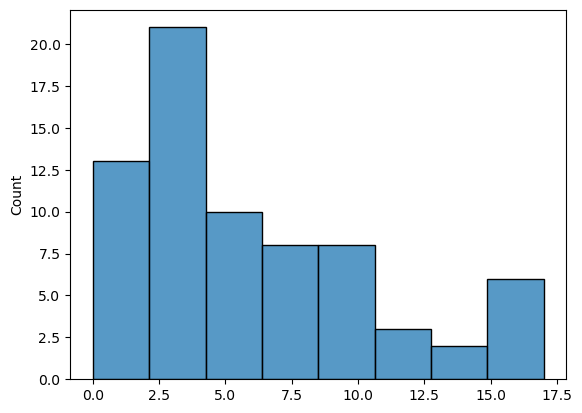

In [64]:
zeroes = data.apply(lambda col: sum(col == 0))
sns.histplot(zeroes)

Not a big problem, just filter out 0 from Y

In [50]:
#data = data[data.R17 != 0]
data.shape

(1353, 71)

illegal input in rows 225 and 1348

#### data outside of range?

In [51]:
#data = data.drop(labels = [225, 1348], axis=0)
data.shape

(1351, 71)

<Axes: ylabel='Count'>

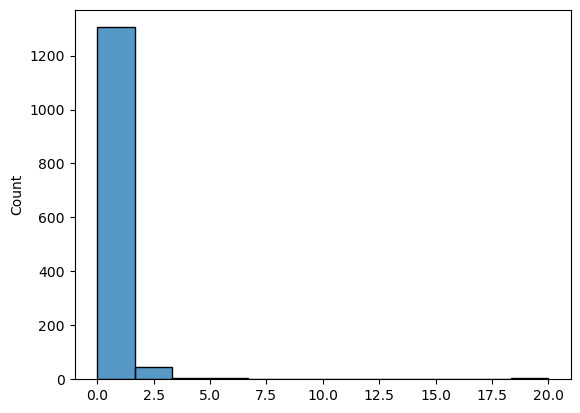

In [65]:
zeroes_rows = data.apply(lambda row: sum(row == 0), axis = 1)
sns.histplot(zeroes_rows)

In [66]:
data.loc[:, data.columns != "submittime"].corr()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
R1,1.000000,0.002255,-0.001235,0.022719,0.031063,0.035389,0.007444,0.025830,0.001791,0.024729,...,0.032219,0.042285,-0.028088,0.021107,0.034292,0.027149,0.029913,-0.003457,0.026408,0.029461
R2,0.002255,1.000000,0.017447,0.088049,0.118392,0.083742,0.037634,0.045600,0.031162,0.089151,...,0.007264,0.028563,-0.040792,0.001147,0.035630,0.033580,0.019028,0.022284,0.028119,0.035402
R3,-0.001235,0.017447,1.000000,-0.060392,0.032700,0.021405,0.007437,0.021346,0.991145,-0.063521,...,0.007254,-0.004483,-0.001952,-0.002854,0.033381,-0.021556,0.000458,-0.025843,-0.002953,0.027951
R4,0.022719,0.088049,-0.060392,1.000000,0.099644,0.147356,0.017557,0.170746,-0.043923,0.132249,...,0.046862,0.006233,0.047742,-0.029816,0.037597,-0.013894,0.009856,0.038608,-0.015604,0.034862
R5,0.031063,0.118392,0.032700,0.099644,1.000000,0.043385,0.044487,0.113653,0.054878,0.066184,...,-0.022652,0.000667,0.027591,-0.016074,0.024130,0.040613,0.010200,-0.029487,-0.027699,0.004454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O6,0.027149,0.033580,-0.021556,-0.013894,0.040613,-0.032964,-0.021255,0.004880,-0.016691,0.041350,...,-0.165836,0.215439,-0.492871,0.242568,-0.279267,1.000000,-0.118385,-0.150118,-0.098561,-0.406279
O7,0.029913,0.019028,0.000458,0.009856,0.010200,0.044664,-0.020409,0.035310,0.005855,0.040237,...,0.310591,-0.368395,0.147340,-0.199455,0.336929,-0.118385,1.000000,0.302430,0.149520,0.331072
O8,-0.003457,0.022284,-0.025843,0.038608,-0.029487,-0.001326,-0.002956,0.022057,-0.023895,0.050544,...,0.635274,-0.268875,0.204401,-0.225405,0.281956,-0.150118,0.302430,1.000000,0.223206,0.312842
O9,0.026408,0.028119,-0.002953,-0.015604,-0.027699,-0.055949,-0.003561,0.035915,-0.006084,0.013166,...,0.240191,-0.183104,0.190724,-0.224632,0.182965,-0.098561,0.149520,0.223206,1.000000,0.223044


<Axes: >

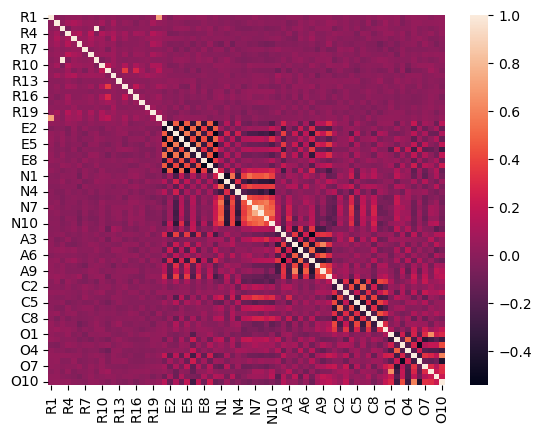

In [67]:
#sns.clustermap(data.loc[:, data.columns != "submittime"])
sns.heatmap(data.loc[:, data.columns != "submittime"].corr())

suggestion: dichotomize the outcome variable?

<class 'pandas.core.series.Series'>
Index: 1351 entries, 0 to 1368
Series name: R3
Non-Null Count  Dtype
--------------  -----
1351 non-null   int64
dtypes: int64(1)
memory usage: 21.1 KB


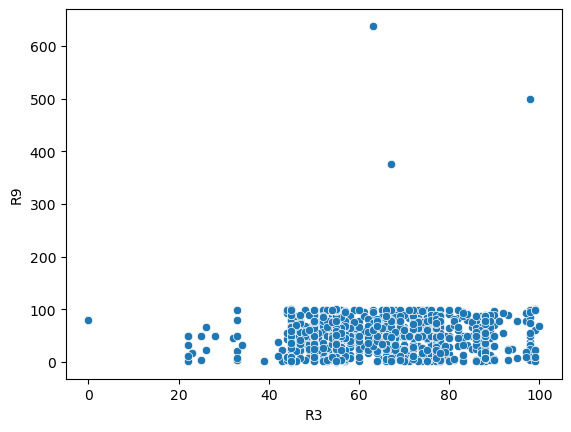

In [55]:
sns.scatterplot(data, x = "R3", y = "R9")
data.R3.info()

In [56]:
data.R20.describe()

count    1351.000000
mean       44.866025
std        14.015038
min         0.000000
25%        40.000000
50%        45.000000
75%        50.000000
max       455.000000
Name: R20, dtype: float64

In [43]:
data.R20[data.R20 == max(data.R20)]

1348    599
Name: R20, dtype: int64

## Questions
Think about what information the dataset contains, and formulate one of the following:

All of our data is continuous or can be interpreted as continuous (1-5 likert scales)



In [59]:
data.R18.describe()

count    1351.000000
mean       54.728349
std       120.825014
min         0.000000
25%        24.000000
50%        50.000000
75%        69.000000
max      4011.000000
Name: R18, dtype: float64

### RQ1
Predict a number from 1-100 (the last time it is chose, column R18)

- Model 0: Always guess the median in the training data
- Model 1: Only predict based on other answers to 1-100
- Model 2: Include other random number picks
- Model 3: Include personality
- (opt) Model 4: Try to construct other columns (feature engineering), ie based on the order of the random number questions and anchoring or consistency.

#### RQ2 (the boring one)
Predict personality from random numbers
Y = data.C7 "I like order"
(or do it for all of them, or predict a composite score)

# 5.


        What kind of metric can you use to assess whether the model predicts successfully?
        What is the simplest performance baseline with no predictors you can use to assess your model's accuracy?
        What is the simplest performance baseline with predictors you can use to assess your model's accuracy?
        Can you produce some visualizations to get a sense for whether any clear pattern is emerging?
            Hint: you can use seaborn displot, pointplot or boxplot to visualize distributions and their summaries, scatterplot or lmplot to produce scatterplots (e.g., visualizing relations between variables)



We can NOT use a metric based on L2 norm (mean squared error), since we are leaving outliers ine